# ***Comparing ML Models for Player Rating Prediction***

Linear Regression Performance:
MAE: 0.35, RMSE: 0.40, R-squared: 0.27

Random Forest Performance:
MAE: 0.22, RMSE: 0.30, R-squared: 0.59

SVR Performance:
MAE: 0.31, RMSE: 0.37, R-squared: 0.40


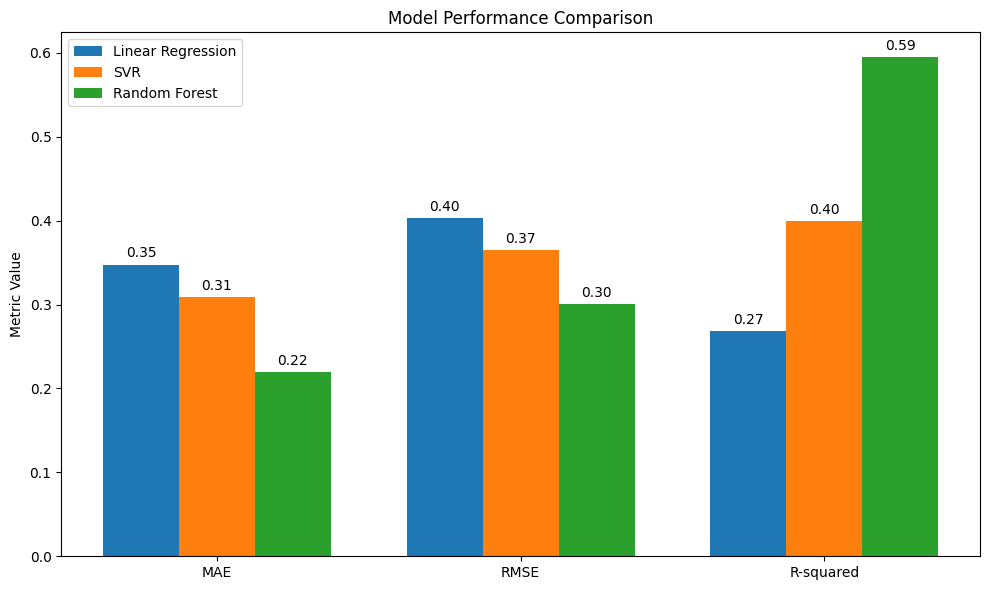


Predicted Fotmob Rating (Linear Regression): 5.42
Predicted Fotmob Rating (SVR): 7.49
Predicted Fotmob Rating (Random Forest): 7.34


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset from CSV file
file_path = "/content/player_stats_extended_full_sample (1).csv"
df = pd.read_csv(file_path)

# Selecting features
features = ['goals', 'assists', 'successful_dribbles', 'dribble_attempts', 'minutes_played', 'dribble_success_rate']
target = 'fotmob_rating'

# Removing unnecessary rows
df = df.dropna(subset=features + [target])

# Defining X and y
X = df[features]
y = df[target]

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

# Model 2: Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

# Model 3: Support Vector Regression (SVR)
svr_pipeline = make_pipeline(StandardScaler(), SVR(kernel='rbf', C=1.0, epsilon=0.2))
svr_pipeline.fit(X_train, y_train)
y_pred_svr = svr_pipeline.predict(X_test)

mae_svr = mean_absolute_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
r2_svr = r2_score(y_test, y_pred_svr)

# Display performances of each model
print("Linear Regression Performance:")
print(f"MAE: {mae_lr:.2f}, RMSE: {rmse_lr:.2f}, R-squared: {r2_lr:.2f}\n")

print("Random Forest Performance:")
print(f"MAE: {mae_rf:.2f}, RMSE: {rmse_rf:.2f}, R-squared: {r2_rf:.2f}\n")

print("SVR Performance:")
print(f"MAE: {mae_svr:.2f}, RMSE: {rmse_svr:.2f}, R-squared: {r2_svr:.2f}")

metrics = ['MAE', 'RMSE', 'R-squared']
lr_metrics = [mae_lr, rmse_lr, r2_lr]
svr_metrics = [mae_svr, rmse_svr, r2_svr]
rf_metrics = [mae_rf, rmse_rf, r2_rf]

x = np.arange(len(metrics))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, lr_metrics, width, label='Linear Regression')
rects2 = ax.bar(x, svr_metrics, width, label='SVR')
rects3 = ax.bar(x + width, rf_metrics, width, label='Random Forest')

# Add text labels and title
ax.set_ylabel('Metric Value')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.tight_layout()
plt.show()


new_player_stats = np.array([[20, 5, 80, 50, 2000, 0.75]])
predicted_rating_lr = lr_model.predict(new_player_stats)
predicted_rating_svr = svr_pipeline.predict(new_player_stats)
predicted_rating_rf = rf_model.predict(new_player_stats)

print(f"\nPredicted Fotmob Rating (Linear Regression): {predicted_rating_lr[0]:.2f}")
print(f"Predicted Fotmob Rating (SVR): {predicted_rating_svr[0]:.2f}")
print(f"Predicted Fotmob Rating (Random Forest): {predicted_rating_rf[0]:.2f}")



# ***Loading FIFA player data***

In [ ]:
df = pd.read_csv("/content/fifa_players.csv")
df.columns

Index(['name', 'full_name', 'birth_date', 'age', 'height_cm', 'weight_kgs',
       'positions', 'nationality', 'overall_rating', 'potential', 'value_euro',
       'wage_euro', 'preferred_foot', 'international_reputation(1-5)',
       'weak_foot(1-5)', 'skill_moves(1-5)', 'body_type',
       'release_clause_euro', 'national_team', 'national_rating',
       'national_team_position', 'national_jersey_number', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'freekick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'composure', 'marking', 'standing_tackle', 'sliding_tackle'],
      dtype='object')

# ***Comparing ML Models for Predicting Player Value***

Columns in the dataset:
Index(['name', 'full_name', 'birth_date', 'age', 'height_cm', 'weight_kgs',
       'positions', 'nationality', 'overall_rating', 'potential', 'value_euro',
       'wage_euro', 'preferred_foot', 'international_reputation(1-5)',
       'weak_foot(1-5)', 'skill_moves(1-5)', 'body_type',
       'release_clause_euro', 'national_team', 'national_rating',
       'national_team_position', 'national_jersey_number', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'freekick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'composure', 'marking', 'standing_tackle', 'sliding_tackle'],
      dtype='object')

Model Evaluation:
Linear Regression Performance:
MAE: 1285784.58, RMSE: 2420219.50, R-squared

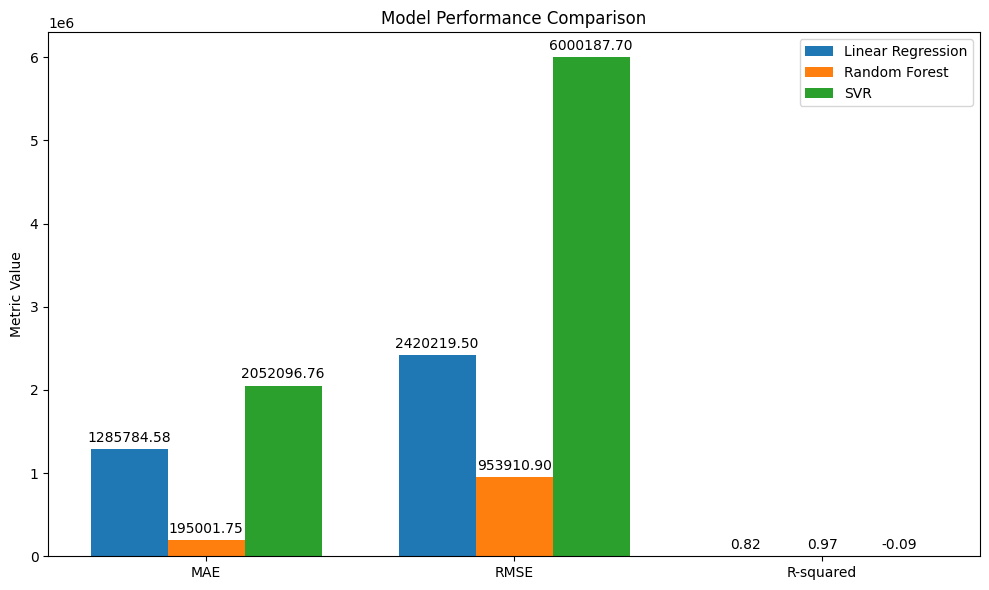

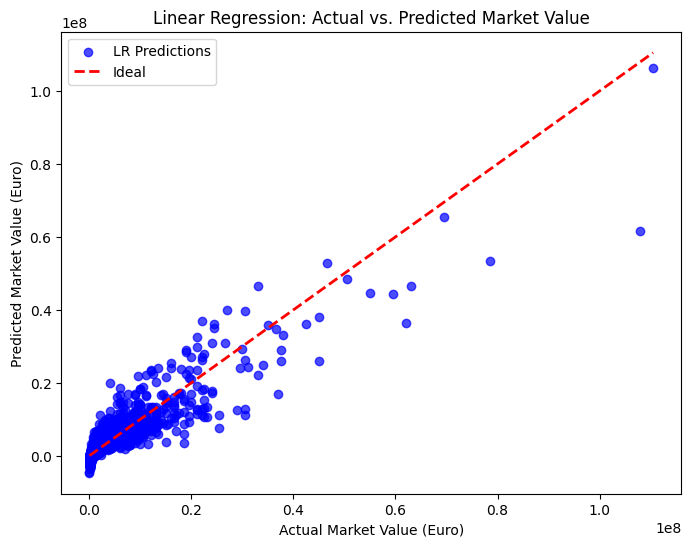

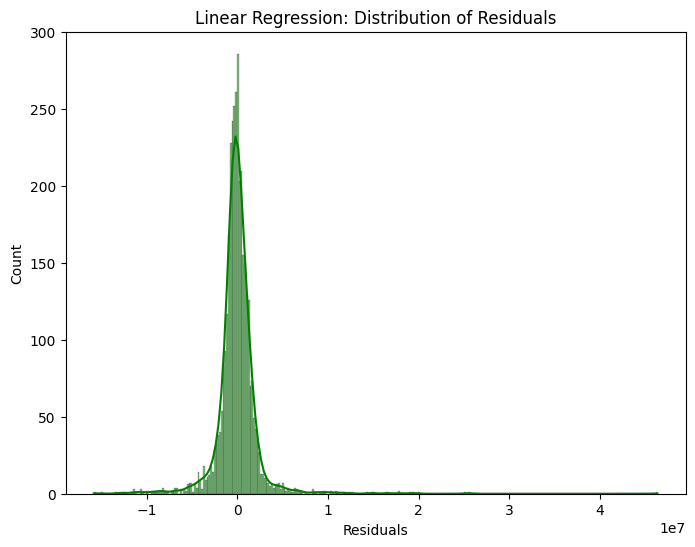

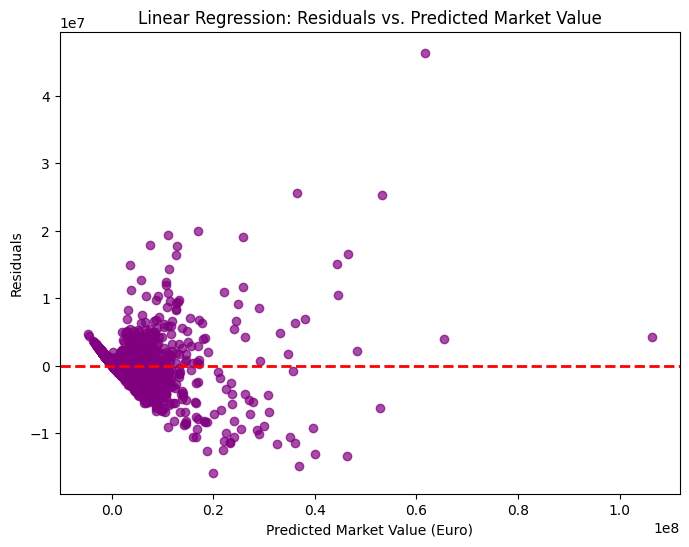


Predicted Market Value for the new player:
Linear Regression: 17054234.02 Euro
Random Forest: 47295000.00 Euro
SVR: 700744.99 Euro


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Loading the fifa players dataset
file_path = "/content/fifa_players.csv"
df = pd.read_csv(file_path)

# Display columns to verify names
print("Columns in the dataset:")
print(df.columns)

# Define features and target variable
features = [
    'age',
    'height_cm',
    'weight_kgs',
    'overall_rating',
    'potential',
    'wage_euro',
    'international_reputation(1-5)',
    'weak_foot(1-5)',
    'skill_moves(1-5)'
]
target = 'value_euro'

# Removing missing data
df = df.dropna(subset=features + [target])

# Defining X and y
X = df[features]
y = df[target]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Model 1: Linear Regression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)


# Model 2: Random Forest Regressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)


# Model 3: Support Vector Regression (SVR)
svr_pipeline = make_pipeline(StandardScaler(), SVR(kernel='rbf', C=1.0, epsilon=0.2))
svr_pipeline.fit(X_train, y_train)
y_pred_svr = svr_pipeline.predict(X_test)

mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)


# Print Evaluation Metrics for each model

print("\nModel Evaluation:")
print("Linear Regression Performance:")
print(f"MAE: {mae_lr:.2f}, RMSE: {rmse_lr:.2f}, R-squared: {r2_lr:.2f}\n")

print("Random Forest Performance:")
print(f"MAE: {mae_rf:.2f}, RMSE: {rmse_rf:.2f}, R-squared: {r2_rf:.2f}\n")

print("SVR Performance:")
print(f"MAE: {mae_svr:.2f}, RMSE: {rmse_svr:.2f}, R-squared: {r2_svr:.2f}\n")


# Comparison Bar Chart

metrics = ['MAE', 'RMSE', 'R-squared']
lr_metrics = [mae_lr, rmse_lr, r2_lr]
rf_metrics = [mae_rf, rmse_rf, r2_rf]
svr_metrics = [mae_svr, rmse_svr, r2_svr]

x = np.arange(len(metrics))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, lr_metrics, width, label='Linear Regression')
rects2 = ax.bar(x, rf_metrics, width, label='Random Forest')
rects3 = ax.bar(x + width, svr_metrics, width, label='SVR')

ax.set_ylabel('Metric Value')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.tight_layout()
plt.show()

# 1. Actual vs. Predicted Scatter Plot (for Linear Regression)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.7, color='blue', label='LR Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal')
plt.xlabel('Actual Market Value (Euro)')
plt.ylabel('Predicted Market Value (Euro)')
plt.title('Linear Regression: Actual vs. Predicted Market Value')
plt.legend()
plt.show()

# 2. Residuals Distribution (for Linear Regression)
residuals_lr = y_test - y_pred_lr
plt.figure(figsize=(8, 6))
sns.histplot(residuals_lr, kde=True, color='green')
plt.xlabel('Residuals')
plt.title('Linear Regression: Distribution of Residuals')
plt.show()

# 3. Residuals vs Predicted Values (for Linear Regression)
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_lr, residuals_lr, alpha=0.7, color='purple')
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.xlabel('Predicted Market Value (Euro)')
plt.ylabel('Residuals')
plt.title('Linear Regression: Residuals vs. Predicted Market Value')
plt.show()


# Predicting Market Value for a New Player

new_player_stats = np.array([[25, 180, 75, 85, 90, 50000, 3, 4, 4]])
predicted_value_lr = lr_model.predict(new_player_stats)
predicted_value_rf = rf_model.predict(new_player_stats)
predicted_value_svr = svr_pipeline.predict(new_player_stats)

print("\nPredicted Market Value for the new player:")
print(f"Linear Regression: {predicted_value_lr[0]:.2f} Euro")
print(f"Random Forest: {predicted_value_rf[0]:.2f} Euro")
print(f"SVR: {predicted_value_svr[0]:.2f} Euro")


# ***Predicting Player Market Value with Machine Learning Model***

In [ ]:
new_player_stats = np.array([[22, 176, 76, 84, 92,20000, 5, 5, 3]])
predicted_value = model.predict(new_player_stats)
print(f"Predicted Market Value (Euro): {predicted_value[0]/1000000}")


Predicted Market Value (Euro): 16.24573469320395


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# ***Categorizing FIFA Players by Condition Based on Ratings***

In [ ]:
import pandas as pd

# Load FIFA player data from a CSV file
file_path = "/content/fifa_players.csv"
df = pd.read_csv(file_path)


print("Columns in the dataset:")
print(df.columns)

# Define a function to determine player condition based on their overall rating
def determine_condition(row):
    rating = row['overall_rating']
    if rating >= 90:
        return 'super'
    elif rating >= 80:
        return 'good'
    elif rating >= 70:
        return 'normal'
    elif rating >= 60:
        return 'bad'
    else:
        return 'awful'

# Creating new column
df['condition'] = df.apply(determine_condition, axis=1)

# Displaying a few rows
print(df[['name', 'overall_rating', 'condition']].head())

# Save to CSV file
output_file = "fifa_players_with_condition.csv"
df.to_csv(output_file, index=False)
print(f"Edited dataset saved to {output_file}")


Columns in the dataset:
Index(['name', 'full_name', 'birth_date', 'age', 'height_cm', 'weight_kgs',
       'positions', 'nationality', 'overall_rating', 'potential', 'value_euro',
       'wage_euro', 'preferred_foot', 'international_reputation(1-5)',
       'weak_foot(1-5)', 'skill_moves(1-5)', 'body_type',
       'release_clause_euro', 'national_team', 'national_rating',
       'national_team_position', 'national_jersey_number', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'freekick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'composure', 'marking', 'standing_tackle', 'sliding_tackle'],
      dtype='object')
           name  overall_rating condition
0      L. Messi              94     super
1    C. Er

# ***Training and Evaluating an SVM Classifier for FIFA Player Conditions***

Accuracy: 0.8910220214568041

Classification Report:
              precision    recall  f1-score   support

       awful       0.85      0.81      0.83       581
         bad       0.90      0.92      0.91      1857
        good       0.88      0.73      0.80       115
      normal       0.91      0.90      0.90       986
       super       0.00      0.00      0.00         3

    accuracy                           0.89      3542
   macro avg       0.71      0.67      0.69      3542
weighted avg       0.89      0.89      0.89      3542



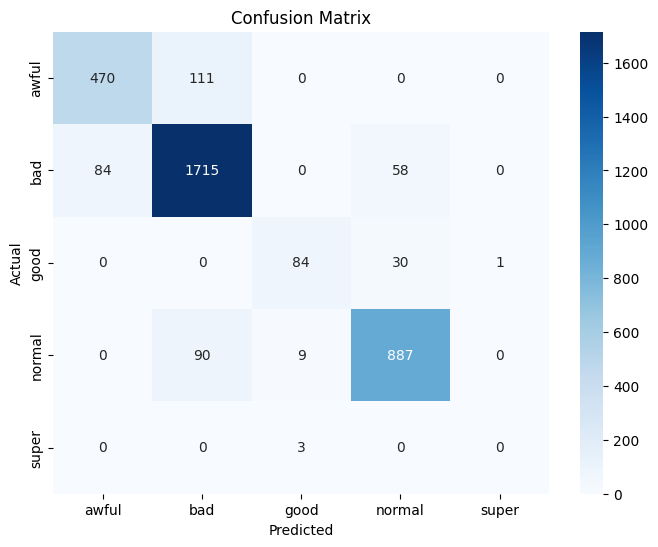

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Dataset
file_path = "/content/fifa_players_with_condition.csv"
df = pd.read_csv(file_path)

# Define the features and the target variable for the classification
features = ['age', 'height_cm', 'weight_kgs', 'potential', 'wage_euro',
            'international_reputation(1-5)', 'weak_foot(1-5)', 'skill_moves(1-5)']
target = 'condition'

# Removing rows with missing data
df = df.dropna(subset=features + [target])

X = df[features]
y = df[target]

# Encode target labels into integers
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # Encodes conditions to integers

# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Create and train the SVM model
svm_pipeline = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=1.0, gamma='scale'))
svm_pipeline.fit(X_train, y_train)

# Evaluating the Model
y_pred = svm_pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# ***Interactive Prediction of FIFA Player Condition***

In [ ]:
import numpy as np

# Prompt the user to input details about the player
print("Please enter the new player's details:")
age = float(input("Age: "))
height = float(input("Height in cm: "))
weight = float(input("Weight in kgs: "))
potential = float(input("Potential: "))
wage = float(input("Wage in Euro: "))
international_reputation = float(input("International reputation (1-5): "))
weak_foot = float(input("Weak foot rating (1-5): "))
skill_moves = float(input("Skill moves rating (1-5): "))

# Create the feature array
new_player_stats = np.array([[age, height, weight, potential, wage, international_reputation, weak_foot, skill_moves]])

# Use the trained SVM model to predict the player's condition
predicted_label = svm_pipeline.predict(new_player_stats)
predicted_condition = le.inverse_transform(predicted_label)

# Predicted conditions
print(f"\nPredicted condition for the new player: {predicted_condition[0]}")



Please enter the new player's details:
Age: 19
Height in cm: 165
Weight in kgs: 60
Potential: 87
Wage in Euro: 50000
International reputation (1-5): 5
Weak foot rating (1-5): 5
Skill moves rating (1-5): 5

Predicted condition for the new player: good


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# ***Analyzing Sentiment of Reddit Posts About Football Players***

In [ ]:
import csv
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Download the VADER lexicon for sentiment analysis
nltk.download('vader_lexicon')

# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Specify the CSV file containing Reddit posts
csv_filename = "reddit_posts_players (2).csv"

# Read the data from the csv file
data = []
with open(csv_filename, "r", encoding="utf-8", errors="replace") as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        data.append(row)


# Group posts by player and season type
player_sentiments = {}

for row in data:
    player = row["player"]
    season_type = row["season_type"]
    title = row["title"]

    # Compute sentiment score for the title
    sentiment = sia.polarity_scores(title)
    compound_score = sentiment["compound"]

    if player not in player_sentiments:
        player_sentiments[player] = {}
    if season_type not in player_sentiments[player]:
        player_sentiments[player][season_type] = {"scores": [], "titles": []}

    player_sentiments[player][season_type]["scores"].append(compound_score)
    player_sentiments[player][season_type]["titles"].append(title)

# Calculate and print the average sentiment for each player and season type
print("Sentiment Analysis Results:")
for player, seasons in player_sentiments.items():
    for season_type, values in seasons.items():
        scores = values["scores"]
        avg_sentiment = sum(scores) / len(scores) if scores else 0
        print(f"Player: {player} | Season: {season_type} | Avg. Sentiment: {avg_sentiment:.3f} (based on {len(scores)} posts)")


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Sentiment Analysis Results:
Player: Marco Asensio | Season: best | Avg. Sentiment: 0.214 (based on 78 posts)
Player: Marco Asensio | Season: worst | Avg. Sentiment: 0.173 (based on 26 posts)
Player: Vinicius jr | Season: best | Avg. Sentiment: 0.154 (based on 22 posts)
Player: Vinicius jr | Season: worst | Avg. Sentiment: 0.276 (based on 9 posts)
Player: Rashford | Season: best | Avg. Sentiment: 0.220 (based on 28 posts)
Player: Rashford | Season: worst | Avg. Sentiment: 0.061 (based on 23 posts)
Player: Neymar | Season: worst | Avg. Sentiment: 0.222 (based on 51 posts)
Player: Eden Hazard | Season: best | Avg. Sentiment: 0.043 (based on 13 posts)
Player: Eden Hazard | Season: worst | Avg. Sentiment: -0.042 (based on 42 posts)
Player: Ousmane Demb�� | Season: best | Avg. Sentiment: 0.000 (based on 12 posts)
Player: Ousmane Demb�� | Season: worst | Avg. Sentiment: 0.107 (based on 23 posts)
Player: David Neres | Season: best | Avg. Sentiment: 0.176 (based on 57 posts)
Player: David Neres

# ***Visualizing Average Sentiment Scores for Football Players by Season***

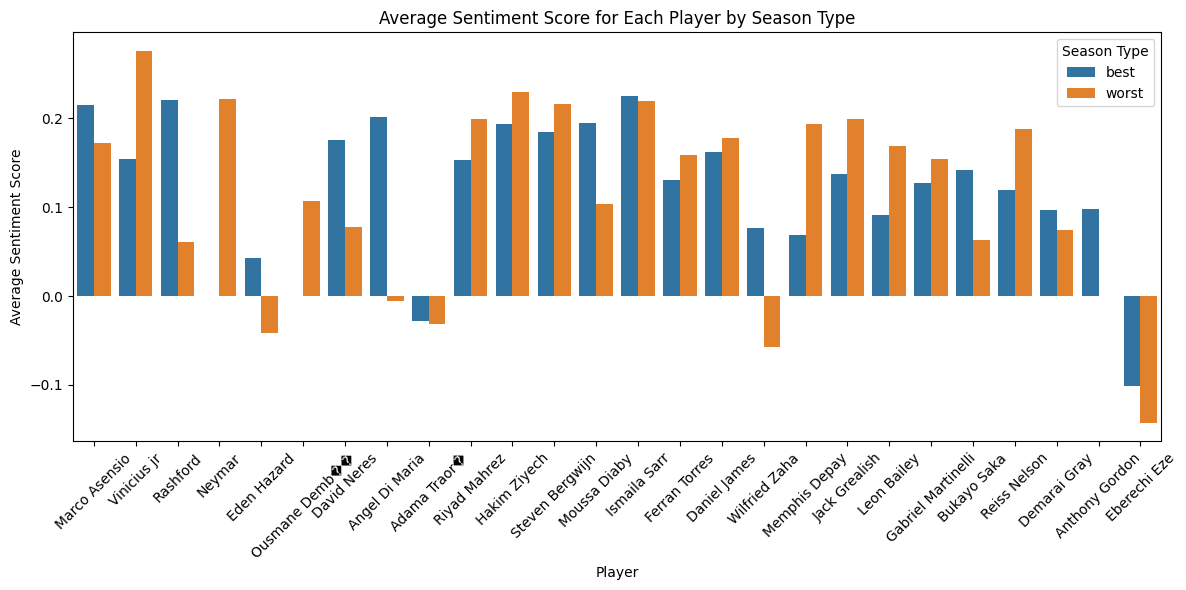

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data for visualization
plot_data = []
for player, seasons in player_sentiments.items():
    for season_type, values in seasons.items():
        scores = values["scores"]
        avg_sentiment = sum(scores) / len(scores) if scores else 0
        plot_data.append({'Player': player, 'Season Type': season_type, 'Average Sentiment': avg_sentiment})

# Convert to DataFrame
df = pd.DataFrame(plot_data)

# Create a bar chart to display average sentiment per player for each season type
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Player', y='Average Sentiment', hue='Season Type')
plt.title('Average Sentiment Score for Each Player by Season Type')
plt.xticks(rotation=45)
plt.xlabel('Player')
plt.ylabel('Average Sentiment Score')
plt.legend(title='Season Type')
plt.tight_layout()

# Display the plot
plt.show()


# ***Visualizing Sentiment Analysis Results Across Multiple Documents***

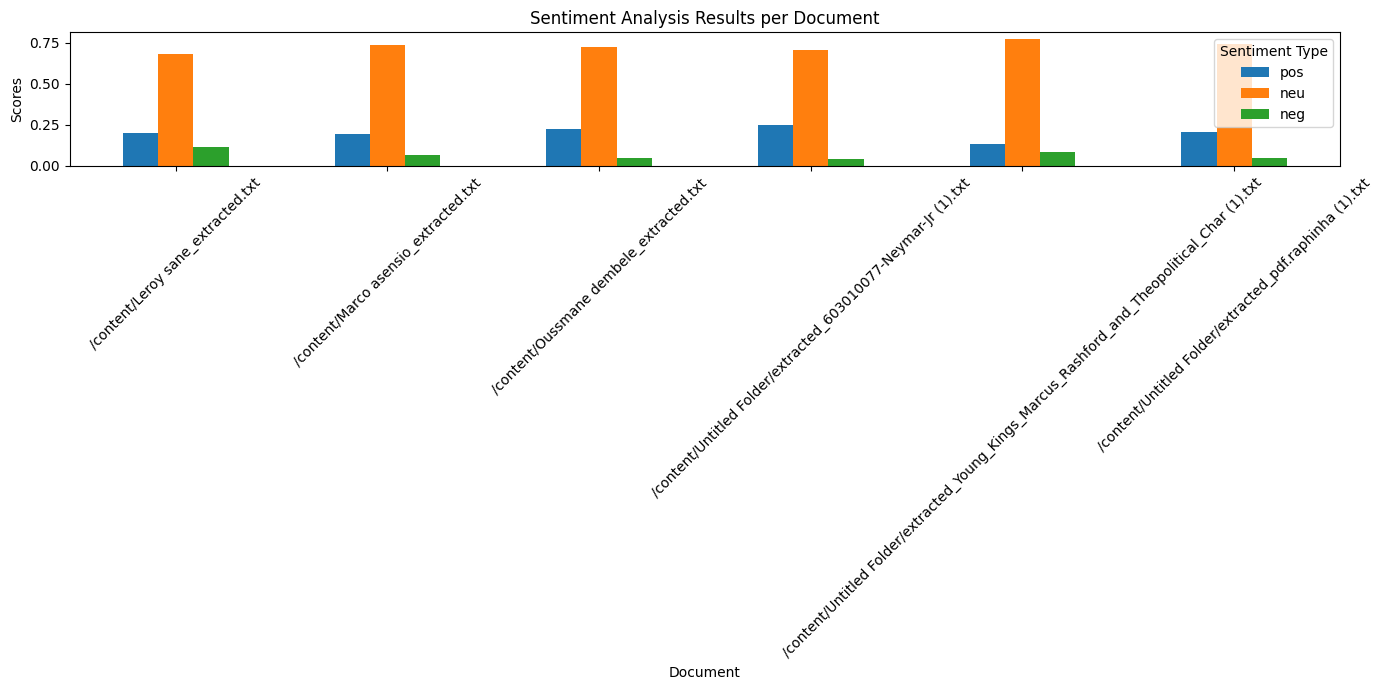

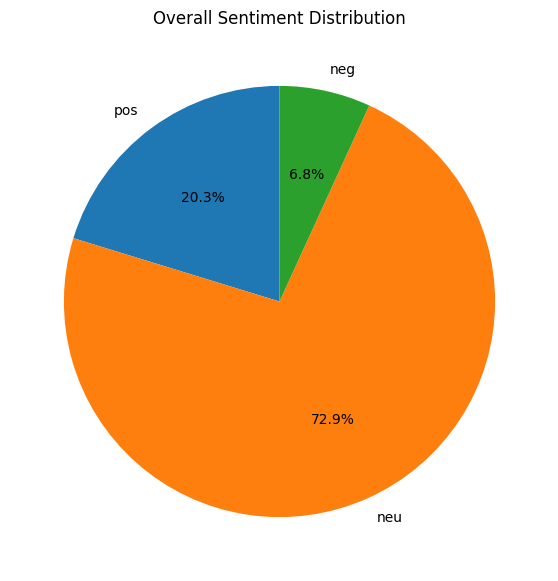

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV files containing sentiment data
files = [
    "/content/processed_Lemmatization_Leroy sane_extracted.csv",
    "/content/processed_Lemmatization_Marco asensio_extracted.csv",
    "/content/processed_Lemmatization_Oussmane dembele_extracted.csv",
    "/content/processed_Lemmatization_extracted_603010077-Neymar-Jr (1).csv",
    "/content/processed_Lemmatization_extracted_Young_Kings_Marcus_Rashford_and_Theopolitical_Char (1).csv",
    "/content/processed_Lemmatization_extracted_pdf.raphinha (1).csv",
]

# Combine all files into a single DataFrame
df_list = [pd.read_csv(f) for f in files]
combined_df = pd.concat(df_list, ignore_index=True)

# Extract sentiment scores into a format that can be easily plotted
combined_df['Sentiment'] = combined_df['Sentiment'].apply(eval)
df_sentiments = pd.json_normalize(combined_df['Sentiment'])
df_sentiments['FileName'] = combined_df['FileName']

# Plotting the bar chart for each document
fig, ax = plt.subplots(figsize=(14, 7))
df_sentiments.set_index('FileName')[['pos', 'neu', 'neg']].plot(kind='bar', ax=ax)
plt.title('Sentiment Analysis Results per Document')
plt.xlabel('Document')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.legend(title='Sentiment Type')
plt.tight_layout()

# Plotting a pie chart for overall sentiment distribution
overall_sentiments = df_sentiments[['pos', 'neu', 'neg']].mean()
plt.figure(figsize=(7, 7))
overall_sentiments.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Overall Sentiment Distribution')
plt.ylabel('')

plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


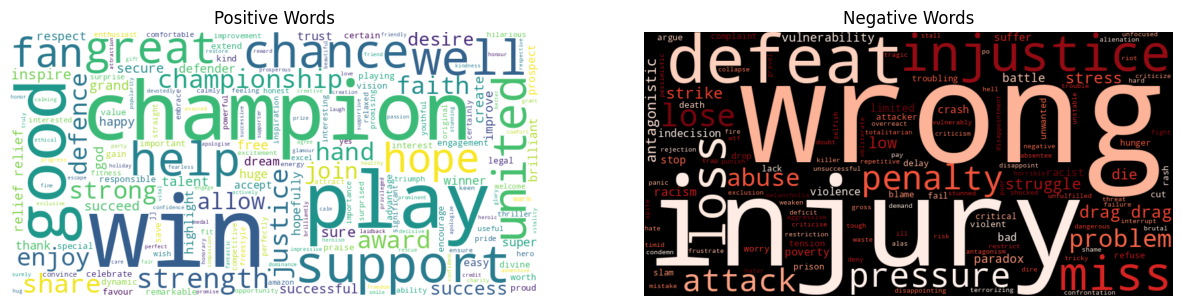

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords


nltk.download('stopwords')
nltk.download('vader_lexicon')

# Initialise the sentiment analyzer
sia = SentimentIntensityAnalyzer()


# Check if 'PreprocessedText' column exists
if 'PreprocessedText' not in combined_df.columns:
    raise ValueError("DataFrame does not have a 'PreprocessedText' column.")

# Ensure the text data is a string and handle NaN values
combined_df['PreprocessedText'] = combined_df['PreprocessedText'].fillna("").astype(str)

# Extract the 'PreprocessedText' series from the DataFrame
text_series = combined_df['PreprocessedText']

# Function to filter words by sentiment
def sentiment_filter(sentences, sentiment_type):
    filtered_words = []
    for sentence in sentences:
        if not isinstance(sentence, str) or not sentence:
            continue
        for word in sentence.split():
            if word.lower() not in stopwords.words('english'):
                # VADER handles punctuation and capitalization, but standardize to lower case for stopword removal
                if sentiment_type == 'positive' and sia.polarity_scores(word)['compound'] > 0.1:
                    filtered_words.append(word)
                elif sentiment_type == 'negative' and sia.polarity_scores(word)['compound'] < -0.1:
                    filtered_words.append(word)
    return ' '.join(filtered_words)

# Extract positive and negative words
positive_text = sentiment_filter(text_series, 'positive')
negative_text = sentiment_filter(text_series, 'negative')

# Generate word clouds
positive_cloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
negative_cloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text)

# Plot the word clouds
fig, axs = plt.subplots(1, 2, figsize=(15, 15))
axs[0].imshow(positive_cloud, interpolation='bilinear')
axs[0].set_title('Positive Words')
axs[0].axis('off')

axs[1].imshow(negative_cloud, interpolation='bilinear')
axs[1].set_title('Negative Words')
axs[1].axis('off')

plt.show()



# ***Evaluating Text Acceptability Based on Sentiment Distribution***

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER lexicon
nltk.download('vader_lexicon')

def get_sentiment_distribution(text):
    """
    Computes the sentiment distribution (as percentages) for the given text.
    Returns a dictionary with keys 'negative', 'neutral', 'positive'.
    """
    sia = SentimentIntensityAnalyzer()
    scores = sia.polarity_scores(text)
    return {
        'negative': scores['neg'] * 100,
        'neutral': scores['neu'] * 100,
        'positive': scores['pos'] * 100
    }

def is_acceptable(text, tol=5):
    """
    Checks if the text sentiment distribution is close to:
      - 60% neutral,
      - 20% positive,
      - 20% negative,
    within a given tolerance (default ±5%).
    Returns a tuple (acceptable: bool, distribution: dict).
    """
    dist = get_sentiment_distribution(text)
    acceptable = (abs(dist['neutral'] - 60) <= tol and
                  abs(dist['positive'] - 20) <= tol and
                  abs(dist['negative'] - 20) <= tol)
    return acceptable, dist

# Get input from the user
user_text = input("Enter text to analyze: ")

# Analyze the sentiment of the input text
acceptable, distribution = is_acceptable(user_text)

# Display results
print("\nSentiment Distribution:")
print(f"Neutral: {distribution['neutral']:.2f}%")
print(f"Positive: {distribution['positive']:.2f}%")
print(f"Negative: {distribution['negative']:.2f}%")

if acceptable:
    print("\nThe text is acceptable.")
else:
    print("\nThe text is not acceptable.")


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Enter text to analyze: 1-1  draw  by  Al  Qadsia  of  Kuwait  in  the  opening  match  of  the  Gulf  Club  Champions League at the Al Thu- mama Stadium yesterday.  Marco  Verratti  got  Al  Arabi  the  equaliser  in  the  71st  minute  af- ter Igor Rossi had put the Kuwaiti  side ahead in the 56th minute. The  Dream Team began their campaign  in  the  regional  tournament  in  an  attacking  mode,  with  most  of  the  pressing coming from them in the  early minutes of the match.  But  the  tides  appeared  to  be  turning  gradually  in  Al  Qadsia’s  favour as the match wore on, with  their central midﬁ  elder Daniel Aji- bola,  a  Nigerian  international  in  particular, proving to be dangerous  with  his  often  eff  ortless  incursion  into  Al  Arabi’s  box,  which  caused  some  headaches  for  the  Qatari  side’s defence.  Rodri  Sanchez  missed  a  golden  chance of putting Al Arabi in front  in  the  25th  minutes  after  his  left- footed  eff  ort,  following  his  bril- l

# ***Training and Evaluating a Text Classification Model on Harsh Comments***

Label distribution in combined dataset:
harsh_label
0    10006
1    10000
Name: count, dtype: int64

Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      2002
           1       0.00      0.00      0.00      2000

    accuracy                           0.50      4002
   macro avg       0.25      0.50      0.33      4002
weighted avg       0.25      0.50      0.33      4002



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


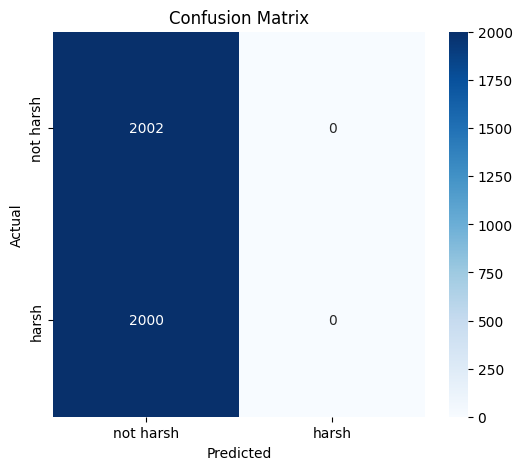

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from multiple CSV files
labeled_files = [
    "/content/processed_Lemmatization_Leroy sane_extracted_labeled.csv",
    "/content/processed_Lemmatization_Marco asensio_extracted_labeled.csv",
    "/content/processed_Lemmatization_Oussmane dembele_extracted_labeled.csv",
    "/content/processed_Lemmatization_extracted_603010077-Neymar-Jr (1)_labeled.csv",
    "/content/processed_Lemmatization_extracted_Young_Kings_Marcus_Rashford_and_Theopolitical_Char (1)_labeled.csv",
    "/content/processed_Lemmatization_extracted_pdf.raphinha (1)_labeled.csv"
]

df_list = [pd.read_csv(f) for f in labeled_files]
df_combined = pd.concat(df_list, ignore_index=True)

# Load additional data for training
synthetic_df = pd.read_csv("/content/synthetic_harsh_comments.csv")

# Combine all data
df_all = pd.concat([df_combined, synthetic_df], ignore_index=True)

# Display the labels
print("Label distribution in combined dataset:")
print(df_all["harsh_label"].value_counts())
X = df_all["PreprocessedText"].fillna("")
y = df_all["harsh_label"]

# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Build and Train the Model
pipeline = make_pipeline(
    TfidfVectorizer(max_df=0.95, min_df=2, ngram_range=(1,3)),
    LogisticRegression(max_iter=1000, class_weight='balanced')
)
pipeline.fit(X_train, y_train)

# Evaluate the Model
y_pred = pipeline.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["not harsh", "harsh"],
            yticklabels=["not harsh", "harsh"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# ***Classifying Comments as Harsh or Not Harsh***

In [ ]:
def classify_comment(text):
    pred = pipeline.predict([text])
    return "harsh" if pred[0] == 1 else "not harsh"

# Prompt user for a new comment
new_comment = input("Enter a comment to classify: ")
result = classify_comment(new_comment)
print("\nThe comment is classified as:", result)


Enter a comment to classify: we dont like him 

The comment is classified as: not harsh
